In [1]:
import os, sys, re
import numpy as np
import pandas as pd
import matplotlib
import pickle
import tarfile
from datetime import datetime
from subprocess import call, Popen
from scipy import interp
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

In [2]:
INPUT_DIR = "data"
train_df = pd.read_csv(os.path.join(INPUT_DIR, "train.csv"), dtype=str)
test_df = pd.read_csv(os.path.join(INPUT_DIR, "test.csv"), dtype=str)
print("Train: ", train_df.shape, "| Test: ", test_df.shape)
print("-"*50)

Train:  (53030, 195) | Test:  (20381, 194)
--------------------------------------------------


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53030 entries, 0 to 53029
Columns: 195 entries, id to Field_82
dtypes: object(195)
memory usage: 78.9+ MB


In [4]:
train_df.shape

(53030, 195)

In [5]:
train_df.head()

,id,label,Field_1,Field_2,Field_3,Field_4,Field_5,Field_6,Field_7,Field_8,...,partner5_H,partner5_K,partner5_L,brief,num_of_phone,Field_78,Field_79,Field_80,Field_81,Field_82
0,0,1,2019-07-24T03:39:02.854Z,2019-07-31T20:10:02Z,1,GH,2018-12-27,2018-12-27,2019-01-01,2019-07-31,...,0.0,0.0,0.0,cb1,1.0,NaN,NaN,NaN,NaN,1
1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,4,1.0,NaN,NaN,NaN,NaN,1
2,2,0,2019-01-17T07:15:26.367Z,2019-01-17T07:17:45Z,2,T1,2019-01-17,2019-01-17,2019-01-01,2019-12-31,...,0.0,0.0,0.0,1,1.0,33.0,10.769445314451085,6.466666666666668,0.0,2
3,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1,1.0,33.0,10.769445314451085,6.466666666666668,0.0,3
4,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1,1.0,33.0,10.769445314451085,6.466666666666668,0.0,3


In [6]:
train_df["diaChi"]

0        23A BT1, Bắc Linh Đàm, Đại Kim, Hoàng Mai, Hà ...
1                                                      NaN
2        thôn Khánh Thọ, Xã Tam Thái, Huyện Phú Ninh, T...
3                                                      NaN
4                                                      NaN
                               ...                        
53025    133/38B Văn Thân, Phường 08, Quận 6, Thành phố...
53026                                                  NaN
53027    Phường Nguyễn Cư Trinh, Quận 1, Thành phố Hồ C...
53028                                                  NaN
53029                                                  NaN
Name: diaChi, Length: 53030, dtype: object

In [7]:
import seaborn as sns
import scipy as stats

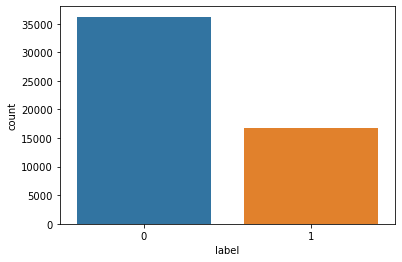

In [8]:
sns.countplot(x="label", data = train_df);

In [9]:
import statistics

### Filde_1

Min:  0
Max:  1
Median:  inf


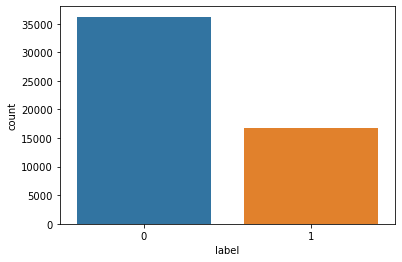

In [10]:
print("Min: ", train_df["label"].min())
print("Max: ", train_df["label"].max())
print("Median: ", train_df["label"].mean())
train_df["label"].isnull().sum()
sns.countplot(x="label", data = train_df);

### Filde_3

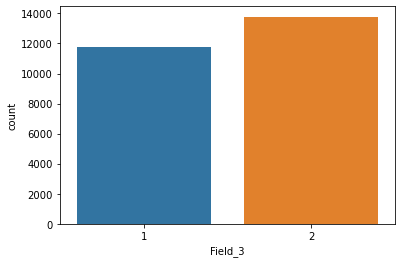

In [11]:
sns.countplot(x="Field_3", data = train_df);

## Filed_4

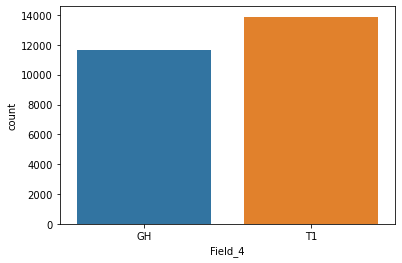

In [12]:
sns.countplot(x="Field_4", data = train_df);

### Field_10

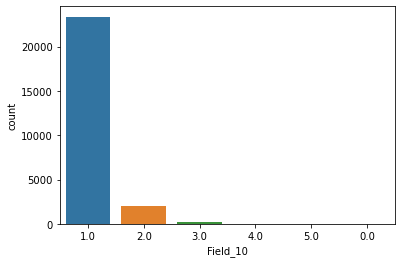

In [13]:
sns.countplot(x="Field_10", data = train_df);

In [14]:
train_df.shape

(53030, 195)

In [15]:
train_df.isnull().sum()

id              0
label           0
Field_1     27466
Field_2     27466
Field_3     27466
            ...  
Field_78    16633
Field_79    25248
Field_80    16710
Field_81    17049
Field_82        0
Length: 195, dtype: int64

In [16]:
train_df.T.isnull().sum()

0         44
1        120
2         33
3        186
4        186
        ... 
53025     19
53026    102
53027     30
53028    120
53029     94
Length: 53030, dtype: int64

In [17]:
train_df["topFriends"].isnull().sum()

32364

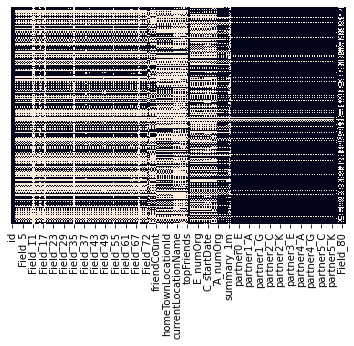

In [18]:
sns.heatmap(train_df.isnull(), yticklabels=False, cbar=False)

### Variable

In [19]:
from statistics import mean

#### Field_3



In [20]:
train_df["Field_3"]

0          1
1        NaN
2          2
3        NaN
4        NaN
        ... 
53025      1
53026    NaN
53027      2
53028    NaN
53029    NaN
Name: Field_3, Length: 53030, dtype: object

In [21]:
train_df["Field_3"].T.isnull().sum()

27466

In [22]:
train_df["Field_3"].isnull().sum()

27466

In [23]:
train_df["Field_3"].values

array(['1', nan, '2', ..., '2', nan, nan], dtype=object)

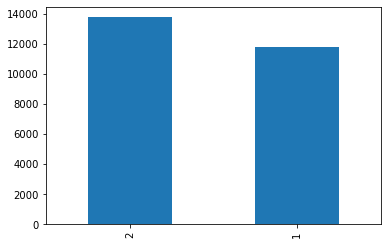

In [24]:
train_df["Field_3"].value_counts().plot(kind="bar");

#### Field_4

In [25]:
train_df["Field_4"]

0         GH
1        NaN
2         T1
3        NaN
4        NaN
        ... 
53025     GH
53026    NaN
53027     T1
53028    NaN
53029    NaN
Name: Field_4, Length: 53030, dtype: object

In [26]:
train_df["Field_4"].isnull().sum()

27466

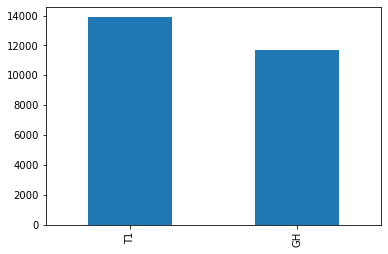

In [27]:
train_df["Field_4"].value_counts().plot(kind="bar");

## Analyze data use sweetviz

In [28]:
import sweetviz as sv

In [29]:
advert_report = sv.analyze(train_df[: 9])
advert_report.show_html("Advertising.html")

:FEATURES DONE:                    |                     | [  0%]   00:15  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!
